### 資料來源：https://www.kaggle.com/spscientist/students-performance-in-exams
gender:性別
race/ethnicity:共分 ABCDE 5個族群
parental level of education:雙親學歷
lunch: 午餐費用
test preparation course:考試準備程度

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
pd_data=pd.read_csv('StudentsPerformance.csv')
pd_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# 1.比較男女三科的平均分數

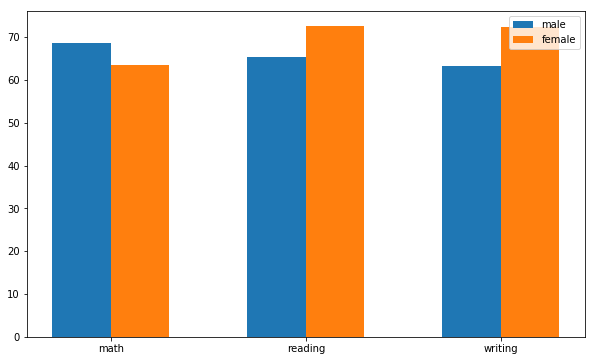

In [3]:
female=pd_data.loc[pd_data.gender=='female']
female_score={'math':female['math score'].mean(), 'reading':female['reading score'].mean(), 'writing':female['writing score'].mean()}
male=pd_data.loc[pd_data.gender=='male']
male_score={'math':male['math score'].mean(), 'reading':male['reading score'].mean(), 'writing':male['writing score'].mean()}

plt.figure(figsize=(10, 6))
plt.bar(np.arange(3), male_score.values(), 0.3, label='male')
plt.bar(np.arange(3)+0.3, female_score.values(), 0.3, label='female')
plt.xticks(np.arange(3)+0.15, male_score.keys())
plt.legend()
plt.show()

# 2.顯示各族群中雙親學歷的分布

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


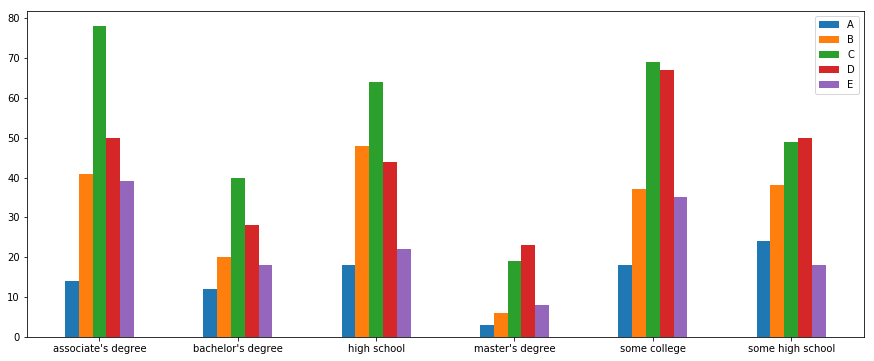

In [4]:
pd_data1=pd_data.groupby(['race/ethnicity', 'parental level of education'])
pd_data2=pd_data1['parental level of education'].agg({'Count':'count'})

plt.figure(figsize=(15, 6))
plt.bar(np.arange(6), pd_data2.loc['group A'].Count, 0.1, label='A')
plt.bar(np.arange(6)+0.1, pd_data2.loc['group B'].Count, 0.1, label='B')
plt.bar(np.arange(6)+0.2, pd_data2.loc['group C'].Count, 0.1, label='C')
plt.bar(np.arange(6)+0.3, pd_data2.loc['group D'].Count, 0.1, label='D')
plt.bar(np.arange(6)+0.4, pd_data2.loc['group E'].Count, 0.1, label='E')
plt.xticks(np.arange(6)+0.2, pd_data2.loc['group A'].index)
plt.legend()
plt.show()

# 3.顯示三科分數之間的相關性

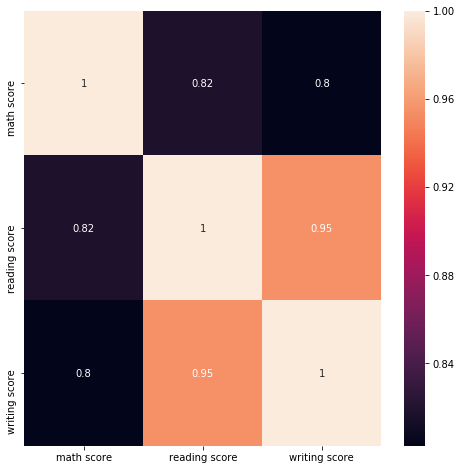

In [5]:
plt.figure(figsize=(8, 8))
sns.heatmap(pd_data.corr(), annot=True)

# 4.雙親學歷和午餐費用的關聯性

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


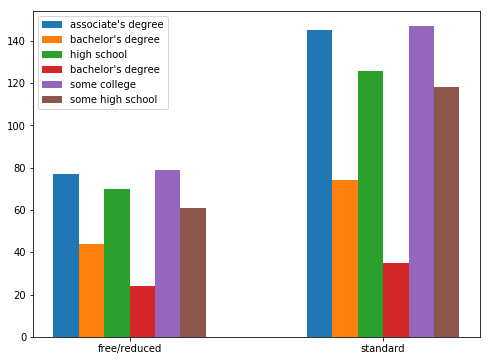

In [46]:
pd_data3=pd_data.groupby(['parental level of education', 'lunch'])
pd_data4=pd_data3['lunch'].agg({'Count':'count'})

plt.figure(figsize=(8, 6))
plt.bar(np.arange(2), pd_data4.loc["associate's degree"].Count, 0.1, label="associate's degree")
plt.bar(np.arange(2)+0.1, pd_data4.loc["bachelor's degree"].Count, 0.1, label="bachelor's degree")
plt.bar(np.arange(2)+0.2, pd_data4.loc['high school'].Count, 0.1, label='high school')
plt.bar(np.arange(2)+0.3, pd_data4.loc["master's degree"].Count, 0.1, label="bachelor's degree")
plt.bar(np.arange(2)+0.4, pd_data4.loc['some college'].Count, 0.1, label='some college')
plt.bar(np.arange(2)+0.5, pd_data4.loc['some high school'].Count, 0.1, label='some high school')
plt.xticks(np.arange(2)+0.25, pd_data4.loc["associate's degree"].index)
plt.legend()
plt.show()